<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

tesla_ticker = yf.Ticker("TSLA")
tesla_ticker

yfinance.Ticker object <TSLA>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla_ticker.history(period="max") 
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data = tesla_ticker.history(period="1y")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())

                       Date        Open        High         Low       Close  \
0 2023-09-26 00:00:00-04:00  242.979996  249.550003  241.660004  244.119995   
1 2023-09-27 00:00:00-04:00  244.259995  245.330002  234.580002  240.500000   
2 2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
3 2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   
4 2023-10-02 00:00:00-04:00  244.809998  254.279999  242.619995  251.600006   

      Volume  Dividends  Stock Splits  
0  101993600        0.0           0.0  
1  136597200        0.0           0.0  
2  117058900        0.0           0.0  
3  128346200        0.0           0.0  
4  123810400        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

html_data = response.text

print(html_data[:500]) 


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [10]:
soup = BeautifulSoup(html_data, 'html.parser')  

print(soup.title.string)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Paso 1: Descarga parseo
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Paso 2: Encontrar todas las tablas 
tables = soup.find_all('table')

# Paso 3: Identificar la tabla "Tesla Quarterly Revenue"
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

# Paso 4: Crear un DataFrame vacío con las columnas "Date" (Fecha) y "Revenue" (Ingresos)
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Paso 5: Extraer las filas de la tabla relevante
if tesla_revenue_table:
    for row in tesla_revenue_table.find_all('tr')[1:]:  # Saltar el encabezado
        cols = row.find_all('td')  # Encontrar todas las celdas de la fila
        if len(cols) >= 2:  # Asegurarse de que haya al menos dos columnas (fecha e ingresos)
            date = cols[0].text.strip()  # Extraer la fecha y eliminar espacios
            revenue = cols[1].text.strip()  # Extraer los ingresos y eliminar espacios
            
            # Paso 6: Limpiar los datos
            revenue = revenue.replace('$', '').replace(',', '').strip()  # Quitar dolar y comas
            
            # Verificar si los ingresos 
            try:
                revenue_float = float(revenue)  #  convertir a float
            except ValueError:
                print(f"Skipping row with non-numeric revenue for date: {date}")
                continue  # Saltar esta fila si no es un número válido

            # Paso 7: Añadir filas al DataFrame usando pd.concat
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue_float]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# show
print(tesla_revenue)

Skipping row with non-numeric revenue for date: 2009-12-31
          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
tesla_revenue['Revenue']

0     21454.0
1     16934.0
2     18756.0
3     17719.0
4     13757.0
5     11958.0
6     10389.0
7     10744.0
8      8771.0
9      6036.0
10     5985.0
11     7384.0
12     6303.0
13     6350.0
14     4541.0
15     7226.0
16     6824.0
17     4002.0
18     3409.0
19     3288.0
20     2985.0
21     2790.0
22     2696.0
23     2285.0
24     2298.0
25     1270.0
26     1147.0
27     1214.0
28      937.0
29      955.0
30      940.0
31      957.0
32      852.0
33      769.0
34      621.0
35      615.0
36      431.0
37      405.0
38      562.0
39      306.0
40       50.0
41       27.0
42       30.0
43       39.0
44       58.0
45       58.0
46       49.0
47       36.0
48       31.0
49       28.0
50       21.0
51       46.0
52       27.0
Name: Revenue, dtype: object

Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0
5,2021-06-30,11958.0
6,2021-03-31,10389.0
7,2020-12-31,10744.0
8,2020-09-30,8771.0
9,2020-06-30,6036.0


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
last_five_rows = tesla_revenue.tail()
print(last_five_rows)


          Date Revenue
48  2010-09-30    31.0
49  2010-06-30    28.0
50  2010-03-31    21.0
51  2009-09-30    46.0
52  2009-06-30    27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
gme_data.reset_index(inplace=True)
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5689,2024-09-20 00:00:00-04:00,19.629999,22.030001,19.480000,21.850000,61919200,0.0,0.0
5690,2024-09-23 00:00:00-04:00,21.540001,22.559999,21.230000,22.309999,13969500,0.0,0.0
5691,2024-09-24 00:00:00-04:00,22.610001,22.719999,21.540001,22.629999,12121400,0.0,0.0
5692,2024-09-25 00:00:00-04:00,22.160000,22.830000,22.070000,22.180000,6111500,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
html_data_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
data  = requests.get(html_data_2).text
soup = BeautifulSoup(data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
tbody = soup.find_all("tbody")[1]  

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
gme_revenue = gme_ticker.quarterly_financials.T
print(gme_revenue.tail())

           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-01-31              -534084.507042           0.111268        83400000.0   
2023-10-31                         0.0              0.279        -3400000.0   
2023-07-31                         0.0              0.067        -4000000.0   
2023-04-30                         0.0              0.002       -44700000.0   
2023-01-31                         NaN                NaN               NaN   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2024-01-31          -4800000.0                             -4800000.0   
2023-10-31                 0.0                                    0.0   
2023-07-31                 0.0                                    0.0   
2023-04-30                 NaN                                    NaN   
2023-01-31           -200000.0                              -200000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2024-01-31   

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


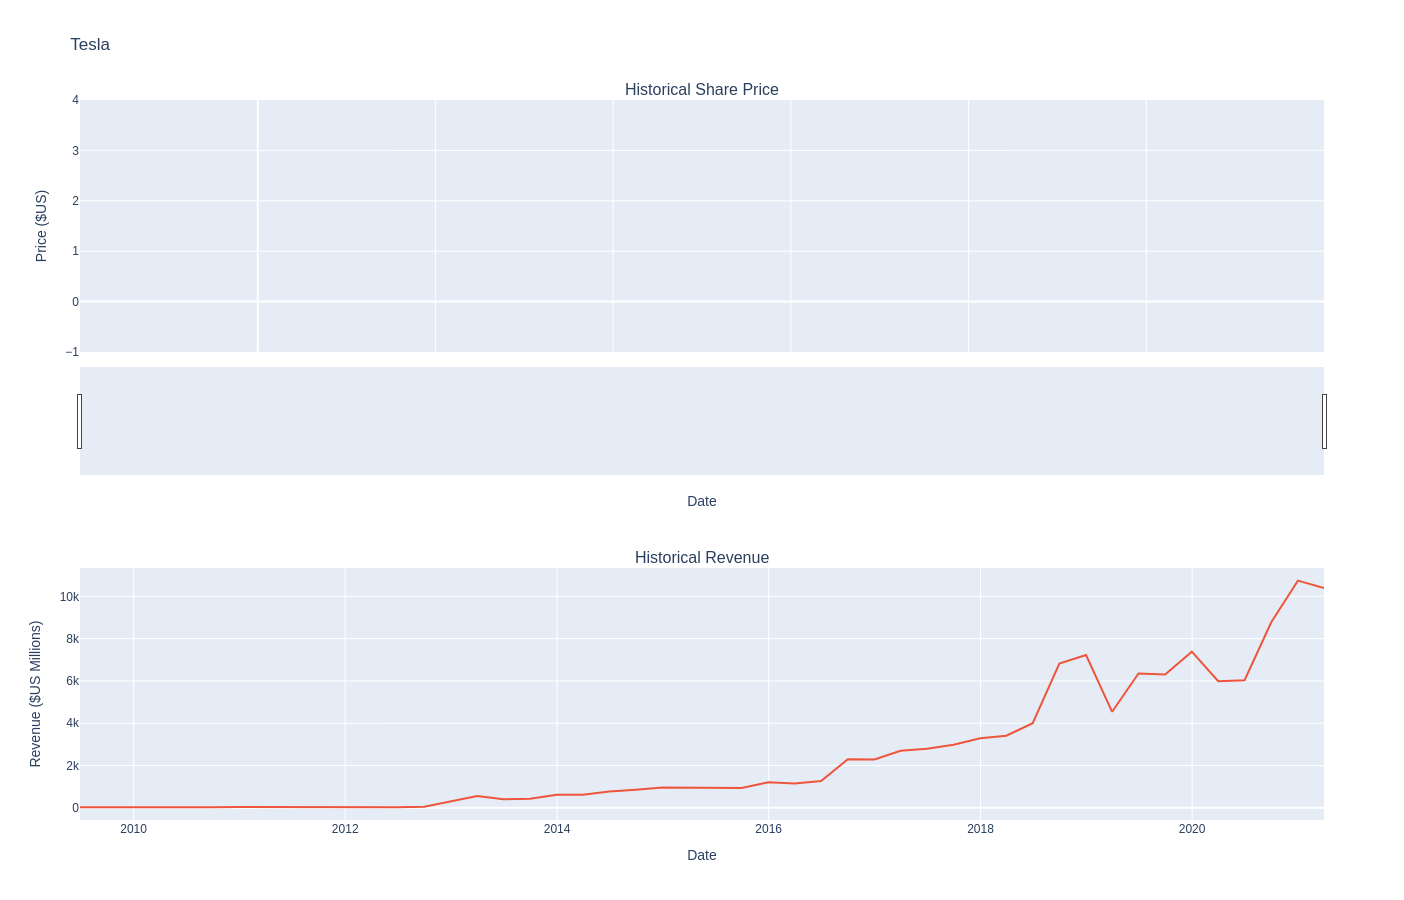

In [26]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


        Date     Revenue
0 2024-07-31 -14400000.0
1 2024-01-31  83400000.0
2 2023-10-31  -3400000.0
3 2023-07-31  -4000000.0
4 2023-04-30 -44700000.0
5 2023-01-31         NaN


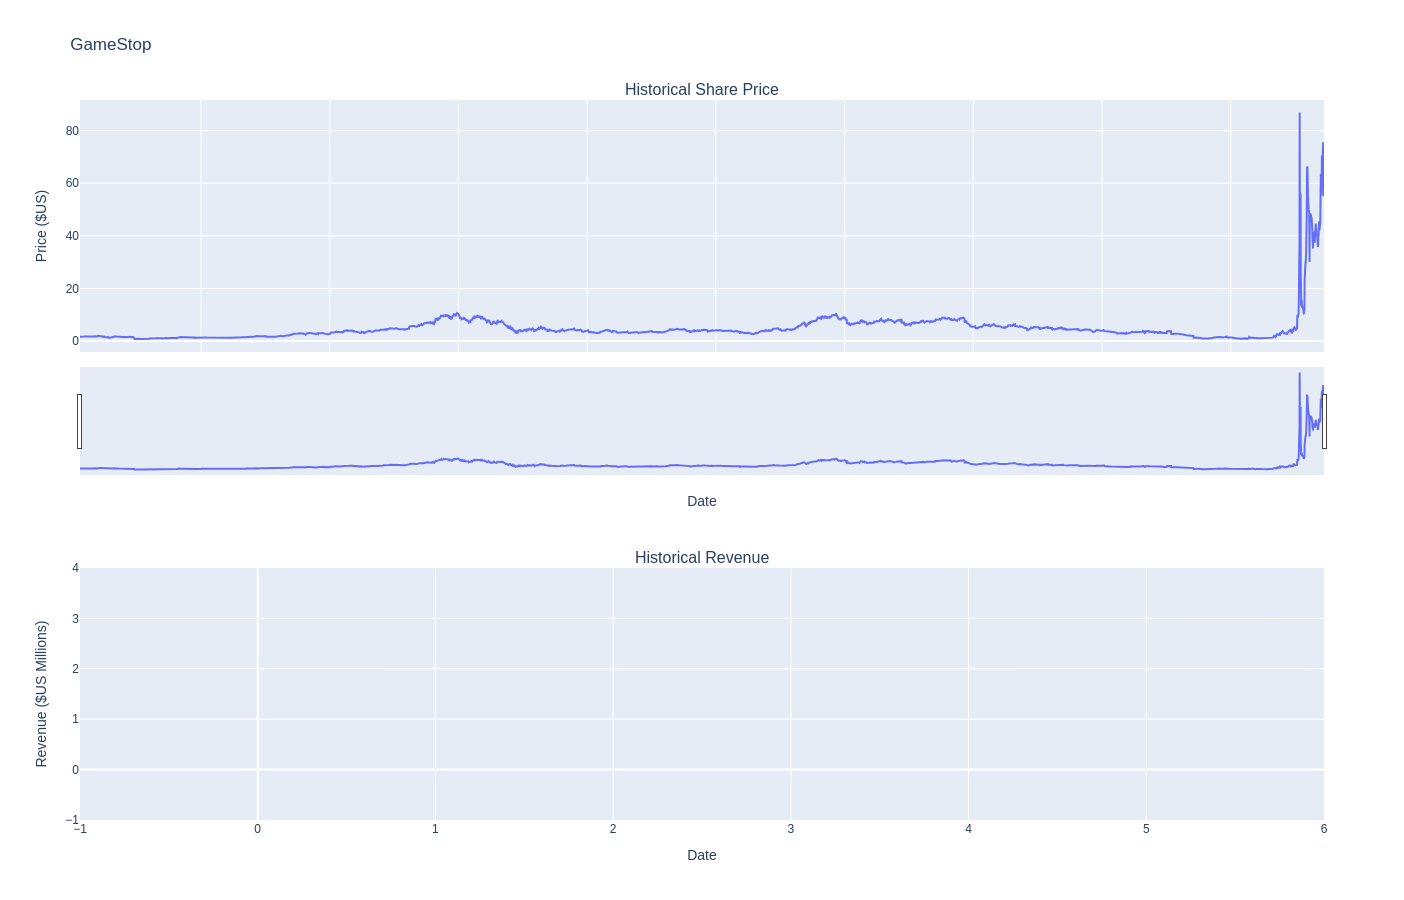

In [46]:
gms_ticker = yf.Ticker("GME")

gms_data = gms_ticker.history(period='max')
gms_data.reset_index(inplace=True)

gms_revenue = gms_ticker.quarterly_financials.T 
gms_revenue.reset_index(inplace=True)  
gms_revenue = gms_revenue[['index', 'Normalized EBITDA']]  
gms_revenue.columns = ['Date', 'Revenue']  

gms_revenue['Date'] = pd.to_datetime(gms_revenue['Date']).dt.strftime('%Y-%m-%d')


gms_revenue['Revenue'] = pd.to_numeric(gms_revenue['Revenue'], errors='coerce') 
gms_revenue.dropna(inplace=True)  


make_graph(gms_data, gms_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
